In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import warnings
import random

warnings.filterwarnings('ignore')
pd.options.display.mpl_style = 'default'

# Acknowledgements

Many of these tips came from talented colleagues and several examples were adapted direclty from Dona Wong's excellent reference book [The Wall Street Journal Guide to Information Graphics: The Dos and Don'ts of Presenting Data, Facts, and Figures](https://www.amazon.com/Street-Journal-Guide-Information-Graphics/dp/0393347281). Buy it!

## Principles

A good visualization will

* Remove the need for lengthy descriptions by contextualizing findings and supporting analysis statements
* Accurately, efficiently and clearly communicate information
* Strike the reader with attractive presentation

An example of what not to write if you can plot your data:
<img src="images/music-fests.png" style="width: 700px;"/>

And a chart you should never make:
<img src="images/bad-line-chart.png" style="width: 300px;"/>

And a map you should never make
<img src="images/bad-map.png" style="width: 1000px;"/>

## Picking the right chart

[The data viz catalogue](http://datavizcatalogue.com/index.html)

<img src="images/catalogue.png" style="width: 400px;"/>

### Five most common types
* Bars for showing categorical comparisons
* Lines for showing trends
* Slopes to show changes
* Scatter plots to show relationships
* Maps for geography

### Other decisions matter as much as the chart

Data transformations, labeling and color selection will make your chart sing
<img src="images/information-encoding.png" style="width: 600px;"/>



# Fitting Data

Many options when plotting data depending on your narrative
* Plot it all... a source gave you a spreadsheet!
* Filter it and show it... too much data is a thing
* Transform it and compare it... does what changed matter more than what happened?
* Aggregate it... are regions more important than individual locations?

### Baselines, Scales and Line Width
* Width of guides, baselines and the trend line itself can obscure or highlight the focal point depending on useage
* No more than four lines on a chart
* Don't be afraid to use panels
* Comparing charts with different orders of magnitude (10s versus 100s) 

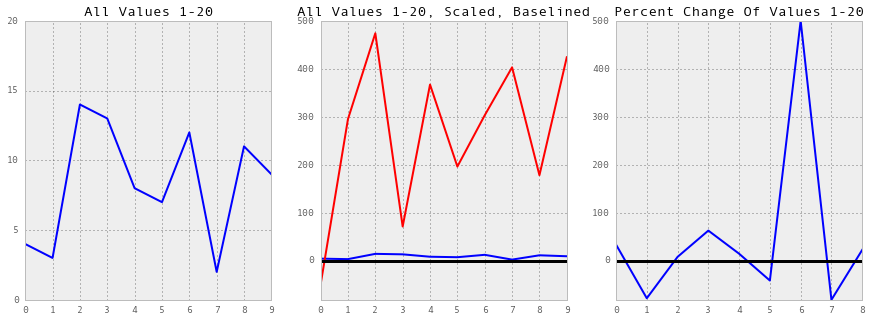

In [22]:
values = random.sample(range(1, 20), 10)
change = [((a2-a1)/a1)*100.0 for a1, a2 in list(zip(values[1:], values))]
big_vals = random.sample(range(int(min(change)), int(max(change))), 10)

fig, axs = plt.subplots(1, 3, sharey=False, figsize=(15, 5))
axs[0].set_ylim(ymin=0, ymax=20)
axs[0].set_title("All Values 1-20")
axs[0].plot(values, linewidth=2, color='b')
axs[1].set_title("All Values 1-20, Scaled, Baselined")
axs[1].set_ylim(ymin=min(change), ymax=max(change))
axs[1].plot(values, linewidth=2, color='b')
axs[1].plot(big_vals, linewidth=2, color='r')
axs[2].set_title("Percent Change Of Values 1-20")
axs[2].set_ylim(ymin=min(change), ymax=max(change))
axs[2].plot(change, linewidth=2, color='b')
axs[0].plot([0, len(change)], [0, 0], color='k', linestyle='-', linewidth=1)
axs[1].plot([0, len(change)], [0, 0], color='k', linestyle='-', linewidth=3)
axs[2].plot([0, len(change)-1], [0, 0], color='k', linestyle='-', linewidth=3)

#### Biased scale example - Same slope

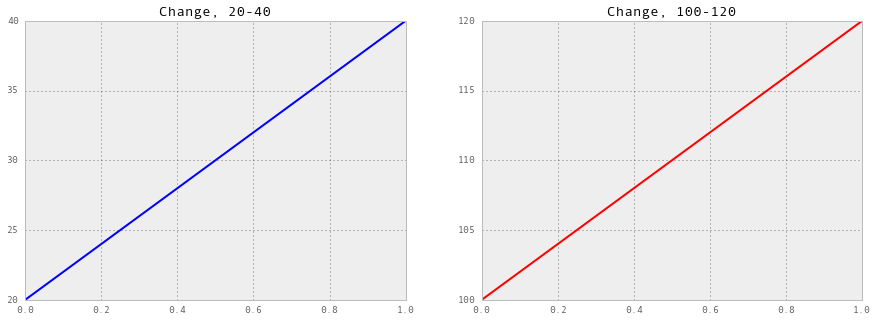

In [25]:
a = [20, 40]
b = [100, 120]
fig, axs = plt.subplots(1, 2, sharey=False, figsize=(15, 5))
axs[0].plot(a, linewidth=2, color='b')
axs[0].set_title("Change, 20-40")
axs[1].set_title("Change, 100-120")
axs[1].plot(b, linewidth=2, color='r')

#### Biased scale example - Same charts, made fair
* Line on the left increases 100%, the line on the right increase just 20%
* slope of each chart should reflect the change

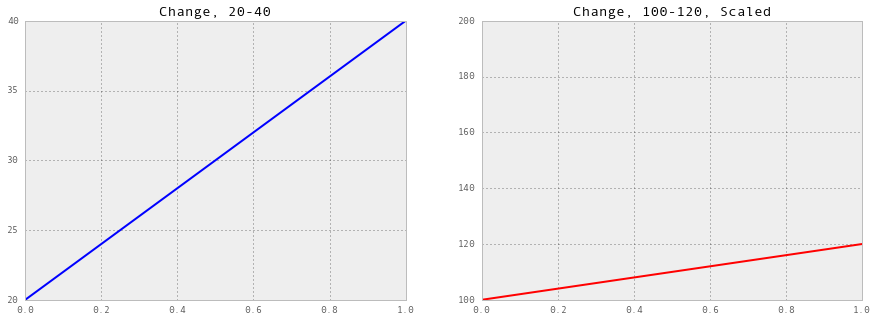

In [26]:
a = [20, 40]
b = [100, 120]
fig, axs = plt.subplots(1, 2, sharey=False, figsize=(15, 5))
axs[0].set_ylim(ymin=20, ymax=40)
axs[0].plot(a, linewidth=2, color='b')
axs[1].set_ylim(ymin=100, ymax=200)
axs[1].plot(b, linewidth=2, color='r')
axs[0].set_title("Change, 20-40")
axs[1].set_title("Change, 100-120, Scaled")

#### Comparing different baselines on bar charts
* *Baselines* Always start at 0 using bar charts (otherwise the plot exaggerates change)
* *Baselines* Pick natural increments for your axes (multiples of 1, 2, 5, 10 etc), round
* Sort your data to show a trend (time, least to greatest, etc)

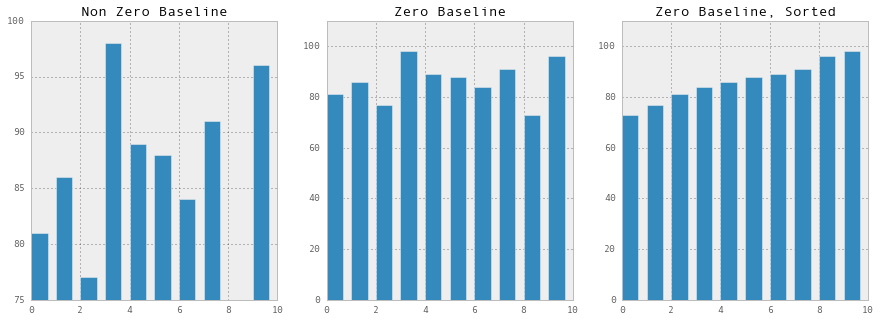

In [27]:
fig, axs = plt.subplots(1, 3, sharey=False, figsize=(15, 5))
values = random.sample(range(70, 100), 10)
axs[0].set_ylim(ymin=75, ymax=100)
axs[0].bar(range(len(values)), values, 1/1.5)
axs[1].set_ylim(ymin=0, ymax=110)
axs[1].bar(range(len(values)), values, 1/1.5)
axs[2].set_ylim(ymin=0, ymax=110)
axs[2].bar(range(len(values)), sorted(values), 1/1.5)

axs[0].set_title("Non Zero Baseline")
axs[1].set_title("Zero Baseline")
axs[2].set_title("Zero Baseline, Sorted")

# Filtering

Some of these rules are more flexible with the introduction of interactive graphics where you can dynamically update the look of a chart based on certain actions

#### Too much data obscures the point of your graphic

<div style='display: flex; justify-content: space-around;'>
<img src="images/hospice-map-all.png" style="width: 400px;height: 200px"/>
<img src="images/hospice-map.png" style="width: 450px;height: 175px"/>
</div>


#### Show uncertainty

<img src="images/heroin-docs.png" style="width: 400px"/>

#### "Accentuate without exaggarating"

<img src="images/iraq.png" style="width: 700px"/>





# Colors

So many rules, use [Colorbrewer](http://colorbrewer2.org/) as much as possible

<img src="images/colorbrewer.png" style="width: 300px;"/>

#### Three types of color progressions to keep in mind based on what you want to highlight
* Sequential moves from *high to low*, covers most types of visualizations especially maps
* Diverging accentuates *extremes* on both sides of your data, useful when highlighting a dearth or deluge
* Qualitative are used to draw distinction between classes, useful on bar charts when you compare your apple to an orange

#### Color bias, shading
* Red means BAD
* Warm colors (red, orange, yellow) overpower cool colors (blue, grey, green) and can be utilized to highlight trends effectively
* Cool colors can be used to show uncertainty


# [WSJ Do's and Don'ts](Infographics.pdf)


# Labels and Styling

<img src="images/chartjunk.gif" style="width: 700px;"/>

#### Quick and dirty rules
* Use direct labeling as much as possible
* Put legends in standard location (lower left/right, above centered)
* Make sure you have a headline, dek, source and footnote when applicable
* If you have missing data, leave a space for it where it would naturally occur and footnote it
* For timelines, stick to AP style dates when possible... abbreviate to MM/YYYY if necessary
* State units on first reference


# Free Tools

* [ChartBuilder](https://github.com/Quartz/Chartbuilder)
* [Tableau](https://public.tableau.com/s/)
* [Microsoft Power BI](https://powerbi.microsoft.com)
* [Plot.ly](https://plot.ly/)
* [Shiny](http://shiny.rstudio.com/)
* [Jupyter / IPython Notebook (advanced, used here)](http://jupyter.readthedocs.io/)
* [CartoDB](https://cartodb.com/)
* [Mapbox](https://www.mapbox.com/)

# Example
## [ChartBuilder](http://quartz.github.io/Chartbuilder/)
## [Death Rates](deaths.csv)